## [Leave One Feature Out Importance](https://github.com/aerdem4/lofo-importance)

It is difficult to calculate the feature importances with traditional ways in such high dimensional data. Thanks to LOFO, we can group the features and get one importance value for the whole group. In this notebook, while each loading feature is considered as separate feature, fnc features are considered as one group. Then we calculate the feature importances for each target using a ridge regression model within cross-validation.


In [1]:
!pip install lofo-importance

In [2]:
import numpy as np
import pandas as pd

loading_df = pd.read_csv("../input/trends-assessment-prediction/loading.csv")
fnc_df = pd.read_csv("../input/trends-assessment-prediction/fnc.csv")

fnc_features, loading_features = list(fnc_df.columns[1:]), list(loading_df.columns[1:])
df = fnc_df.merge(loading_df, on="Id")


labels_df = pd.read_csv("../input/trends-assessment-prediction/train_scores.csv")
labels_df["is_train"] = True

df = df.merge(labels_df, on="Id", how="left")

test_df = df[df["is_train"] != True].copy()
df = df[df["is_train"] == True].copy()

df.shape, test_df.shape

((5877, 1411), (5877, 1411))

In [3]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from lofo import LOFOImportance, Dataset, plot_importance


def get_lofo_importance(target):
    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    dataset = Dataset(df=df[df[target].notnull()], target=target, features=loading_features, 
                      feature_groups={"fnc": df[df[target].notnull()][fnc_features].values/500})

    model = Ridge(0.01)
    lofo_imp = LOFOImportance(dataset, cv=cv, scoring="neg_mean_absolute_error", model=model)

    return lofo_imp.get_importance()

/opt/conda/lib/python3.7/site-packages/lofo/lofo_importance.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


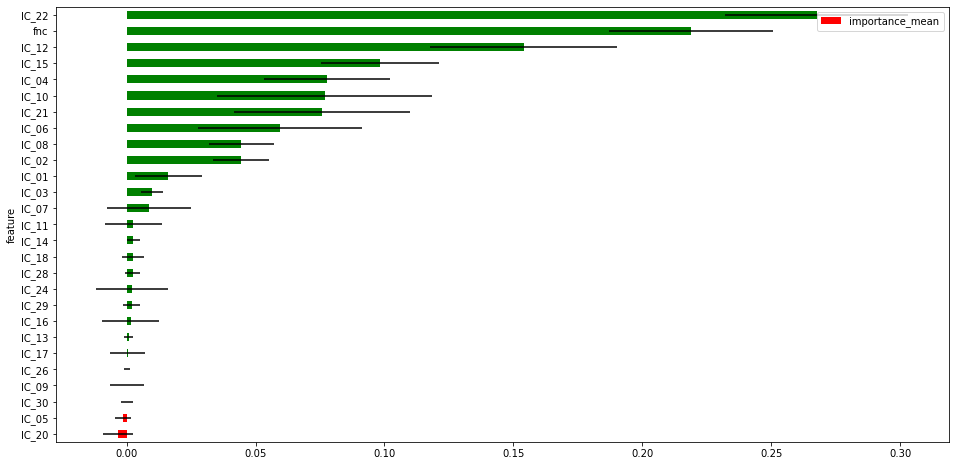

In [4]:
plot_importance(get_lofo_importance(target="age"), figsize=(16, 8))

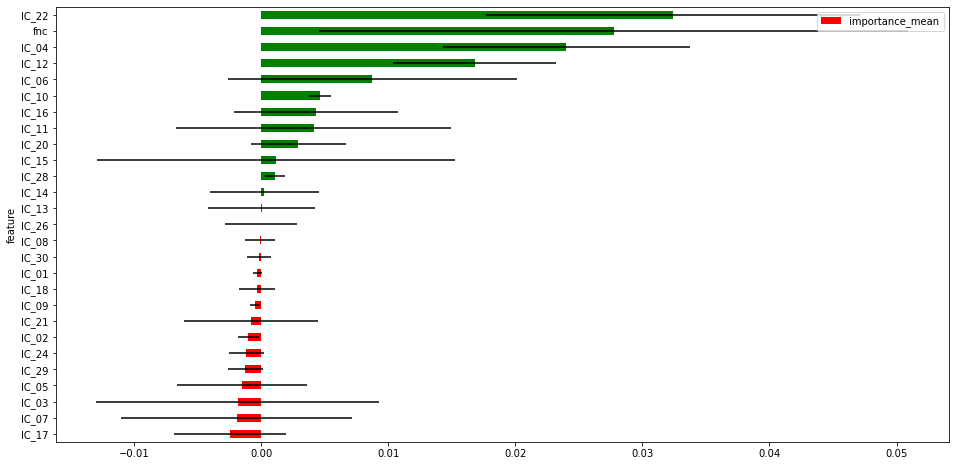

In [5]:
plot_importance(get_lofo_importance(target="domain1_var1"), figsize=(16, 8))

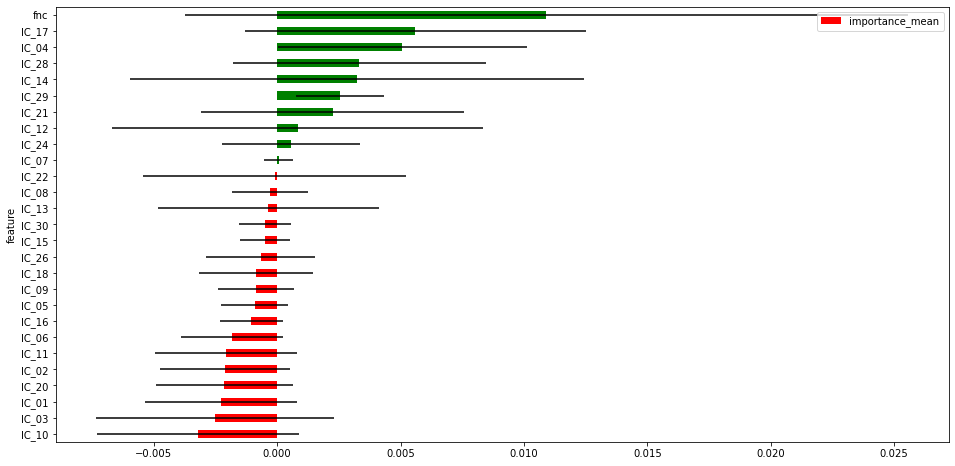

In [6]:
plot_importance(get_lofo_importance(target="domain1_var2"), figsize=(16, 8))

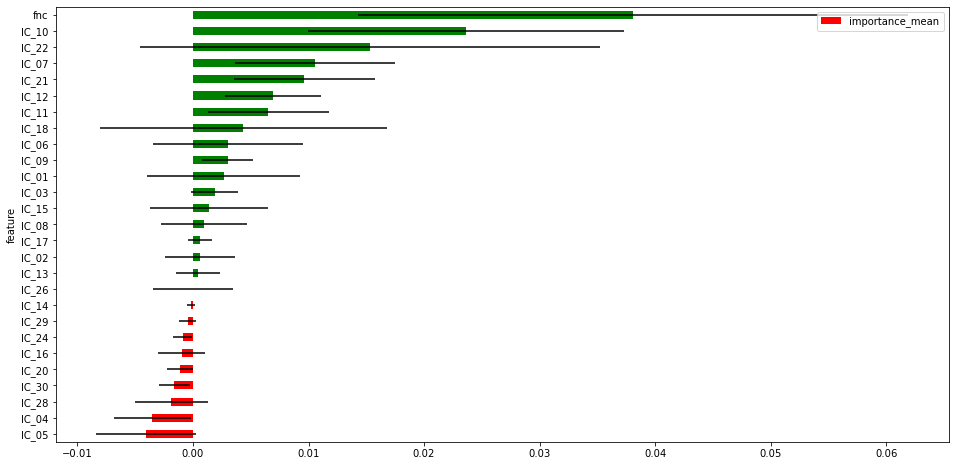

In [7]:
plot_importance(get_lofo_importance(target="domain2_var1"), figsize=(16, 8))

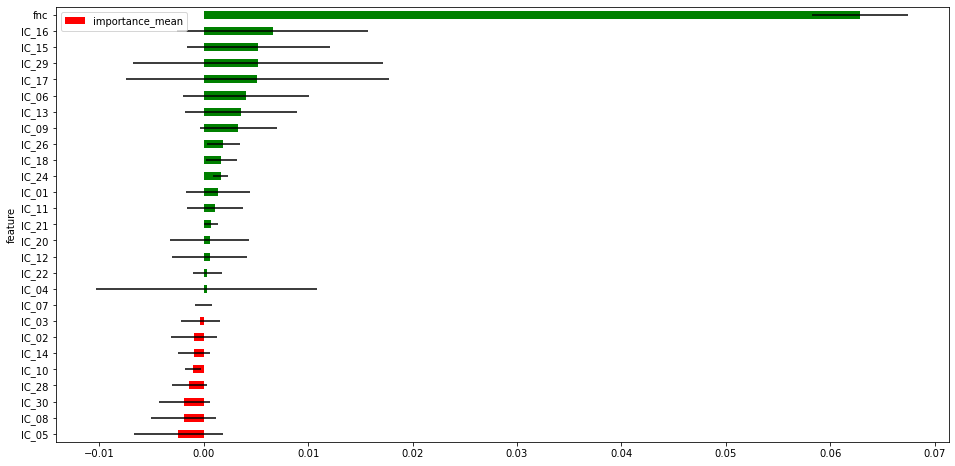

In [8]:
plot_importance(get_lofo_importance(target="domain2_var2"), figsize=(16, 8))